In [1]:
import os
import sys
import glob

In [2]:
in_notebooks_dir = (
    (os.path.basename(os.getcwd()) == 'notebooks') and 
    (os.path.exists(os.path.join(os.path.dirname(os.getcwd()), 'src')))
)
if in_notebooks_dir:
    os.chdir(os.path.dirname(os.getcwd()))

srcdir = os.path.join('..', 'src')
if srcdir not in sys.path:
    sys.path.insert(0, srcdir)

In [3]:
from torchvision import transforms
from torch.utils.data import DataLoader
from src.models.models import SimpleModel
from src.data.datasets import SRDataset
from src.data.transforms import Pad
from src.utils.torch_utils import reverse_image_standardisation
import torch
import torch.optim as optim
import torch.nn as nn
# from torchmetrics import PeakSignalNoiseRatio

### Parse json file of names
using preprocessing.py

In [4]:
import json
with open('data/raw/CGG_data/train/preprocessing.json', 'r') as test_file:
    preprocessing_dict = json.load(test_file)

In [5]:
# check whether separate rgb_means are needed for val, test
rgb_means = preprocessing_dict['means']
rgb_stds = preprocessing_dict['stds']

### Compose transforms

In [6]:
from src.utils.torch_utils import compose_transforms_dict

#example code:
config_dict={
  'flip_horizontal':True,
  'flip_vertical':True,
  'pad_training':(3, 107, 107),
  'pad_target':(3, 1070, 1070),}


data_transforms = compose_transforms_dict(config_dict, rgb_means, rgb_stds)

### old code:
# data_transforms = {
#     'train_input': transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=rgb_means, std=rgb_stds),
#         Pad(desired_size=(3, 107, 107)),
#         transforms.RandomHorizontalFlip(),
#     ]),
#     'train_target': transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=rgb_means, std=rgb_stds),
#         Pad(desired_size=(3, 1070, 1070)),
#         transforms.RandomHorizontalFlip(),
#     ]),
#     'val_input': transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=rgb_means, std=rgb_stds),
#         Pad(desired_size=(3, 107, 107)),
#     ]),
#     'val_target': transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=rgb_means, std=rgb_stds),
#         Pad(desired_size=(3, 1070, 1070)),
#     ]),
#     'test_input': transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=rgb_means, std=rgb_stds),
#         Pad(desired_size=(3, 107, 107)),
#     ]),
#     'test_target': transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=rgb_means, std=rgb_stds),
#         Pad(desired_size=(3, 1070, 1070)),
#     ]),
# }

### Load training dataset


In [7]:
train_dataset = SRDataset(
    fnames = preprocessing_dict['train'],
    img_dir = f'data/raw/CGG_data/train/10x',
    target_dir = f'data/raw/CGG_data/train/gt',
    transform=data_transforms['train_input'],
    target_transform=data_transforms['train_target'] 
)
val_dataset = SRDataset(
    fnames = preprocessing_dict['val'],
    img_dir = f'data/raw/CGG_data/train/10x',
    target_dir = f'data/raw/CGG_data/train/gt',
    transform=data_transforms['val_input'],
    target_transform=data_transforms['val_target'] 
)
test_dataset = SRDataset(
    fnames = preprocessing_dict['test'],
    img_dir = f'data/raw/CGG_data/train/10x',
    target_dir = f'data/raw/CGG_data/train/gt',
    transform=data_transforms['test_input'],
    target_transform=data_transforms['test_target'] 
)

In [8]:
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=10, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=False)

print(f'Training samples: {len(train_dataloader)}')
print(f'Validation samples: {len(val_dataloader)}')
print(f'Testing samples: {len(test_dataloader)}')

Training samples: 86
Validation samples: 19
Testing samples: 19


In [10]:
img, target = next(iter(train_dataloader))
# print(torch.max(img), torch.min(img))


                 



tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -1.0218, -1.5548,  ..., -1.2122, -1.3835,  0.0000],
          [ 0.0000, -1.2693, -1.3454,  ..., -1.0980, -1.4026,  0.0000],
          ...,
          [ 0.0000,  0.0822,  0.0632,  ..., -1.2503, -1.2312,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -1.0138, -1.7284,  ..., -1.2371, -1.4828,  0.0000],
          [ 0.0000, -1.2595, -1.4381,  ..., -1.0585, -1.5274,  0.0000],
          ...,
          [ 0.0000,  0.0580,  0.0356,  ..., -1.3041, -1.3265,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.9268, -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 107, 107])
image 0


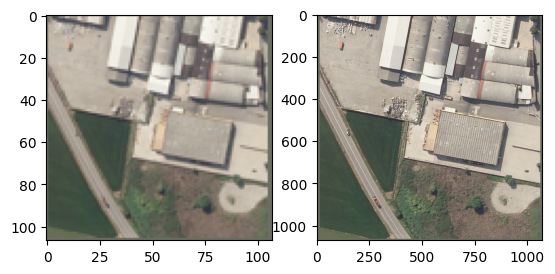

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 1


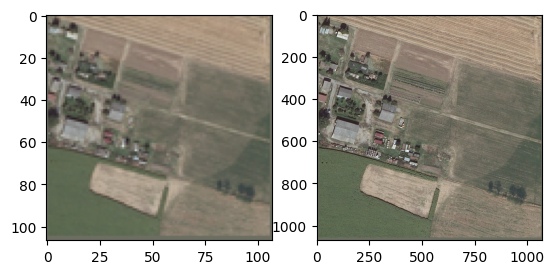

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 2


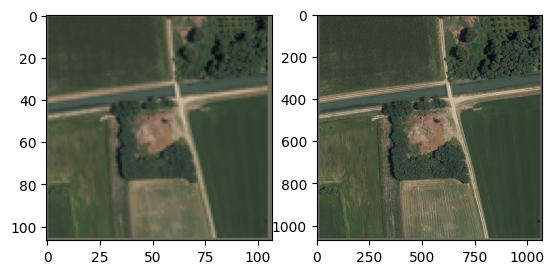

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 3


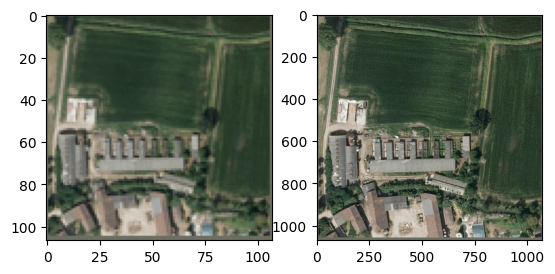

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 4


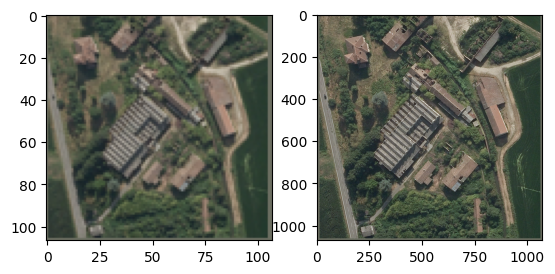

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 5


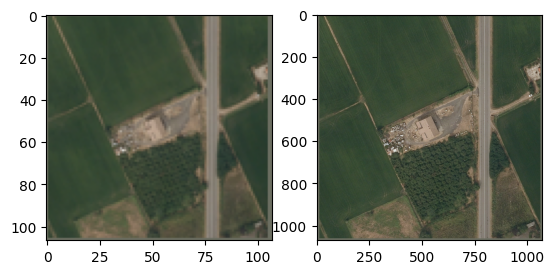

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 6


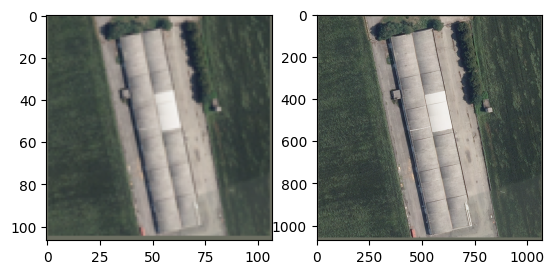

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 7


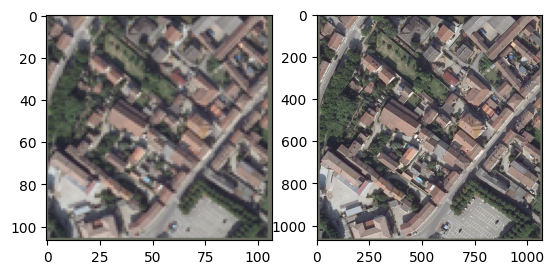

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 8


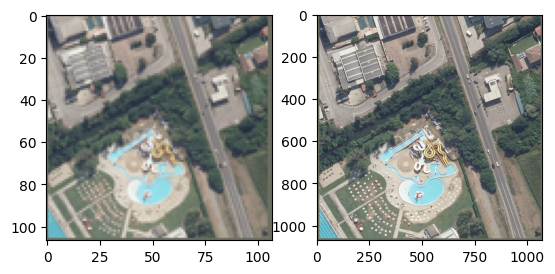

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 9


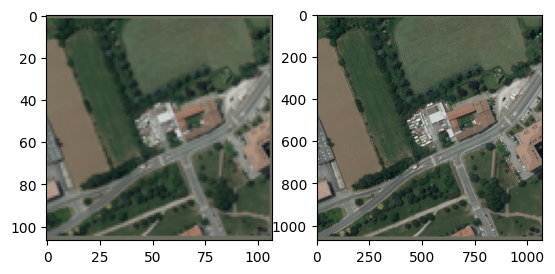

In [10]:
import matplotlib.pyplot as plt

print(img.size())
for i in range(len(img)):
    print(f'image {i}')
    pic = reverse_image_standardisation(img[i], rgb_means, rgb_stds)
    target_pic = reverse_image_standardisation(target[i], rgb_means, rgb_stds) 
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(torch.permute(pic, (2,1,0)).cpu().numpy()) 
    ax[1].imshow(torch.permute(target_pic, (2,1,0)).cpu().numpy())
    plt.show()
                 

### Training on GPU/CPU

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define training loop

In [11]:
from src.trainer.trainer import train_loop

# def train_loop(train_dataloder, val_dataloader, model, loss_fn, optimizer, metric_fn, num_epochs, device):
#     for epoch in range(num_epochs):
#         train_loss = 0.0
#         model.train()
#         for i, data in enumerate(train_dataloader):
#             start_time = time.time()
#             inputs, targets = data[0].to(device), data[1].to(device)

#             outputs = model(inputs)
#             loss = loss_fn(outputs, targets)
            
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             train_loss += loss.item()
# #             if i % 50 == 49:    # print every 50 mini-batches
#             print(f'[{i+1}/{len(train_dataloader)}] Epoch: {epoch + 1}, Train loss: {train_loss/(i+1) :.3f}')
#             train_loss = 0.0
#         val_metric = evaluate(val_dataloader, model, metric_fn, device)
#         print(f'Epoch: {epoch + 1}, Validation Metric: {val_metric:.3f}')

#     print('Finished Training')

In [12]:
from src.trainer.trainer import evaluate


# def evaluate(dataloader, model, metric_fn, device):
# #     enhancement: pass in set of metric_fns to compute multiple metrics    
#     num_batches = len(dataloader)
#     test_loss, correct = 0, 0
#     metric_vals = []
#     model.eval()
#     with torch.no_grad():
#         for img_batch, target_batch in dataloader:
#             img_batch = img_batch.to(device)
#             target_batch = target_batch.to(device)
#             output = model(img_batch)
#             output = reverse_image_standardisation(output, rgb_means, rgb_stds)
#             target_batch = reverse_image_standardisation(target_batch, rgb_means, rgb_stds)

#             metric_val = metric_fn(output, target_batch)
#             metric_vals.append(metric_val)

#     return torch.mean(torch.cat(metric_vals))

In [13]:
from src.utils.torch_utils import compute_psnr

# def compute_psnr(x, y, max_pixel=1):
#     x = x / float(max_pixel)
#     y = y / float(max_pixel)
#     mse = torch.mean((x - y) ** 2, dim=[1, 2, 3])
#     psnr_val = 20 * torch.log10(max_pixel/torch.sqrt(mse))
#     return psnr_val

### Define loss function and optimizer

In [14]:
# model = SimpleModel()
# model.to(device)
# loss_fn = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# num_epochs = 1

train_config={
    'model': 'SimpleModel',
    'optimizer': 'adam',
    'loss': 'MSE',
    'metric_fn': 'psnr',
    'num_epochs': 1,
    'lr': 0.001
}

### train the network

In [15]:
train_loop(train_config, train_dataloader, val_dataloader, device, rgb_means, rgb_stds)

[1/86] Epoch: 1, Train loss: 1.454
[2/86] Epoch: 1, Train loss: 0.675
[3/86] Epoch: 1, Train loss: 0.475
[4/86] Epoch: 1, Train loss: 0.264
[5/86] Epoch: 1, Train loss: 0.262
[6/86] Epoch: 1, Train loss: 0.182
[7/86] Epoch: 1, Train loss: 0.173
[8/86] Epoch: 1, Train loss: 0.144
[9/86] Epoch: 1, Train loss: 0.134
[10/86] Epoch: 1, Train loss: 0.115
[11/86] Epoch: 1, Train loss: 0.098
[12/86] Epoch: 1, Train loss: 0.103
[13/86] Epoch: 1, Train loss: 0.107
[14/86] Epoch: 1, Train loss: 0.089
[15/86] Epoch: 1, Train loss: 0.086
[16/86] Epoch: 1, Train loss: 0.065
[17/86] Epoch: 1, Train loss: 0.075
[18/86] Epoch: 1, Train loss: 0.067
[19/86] Epoch: 1, Train loss: 0.060
[20/86] Epoch: 1, Train loss: 0.063
[21/86] Epoch: 1, Train loss: 0.055
[22/86] Epoch: 1, Train loss: 0.064
[23/86] Epoch: 1, Train loss: 0.048
[24/86] Epoch: 1, Train loss: 0.048
[25/86] Epoch: 1, Train loss: 0.037
[26/86] Epoch: 1, Train loss: 0.042
[27/86] Epoch: 1, Train loss: 0.043
[28/86] Epoch: 1, Train loss: 0.045
[

In [ ]:
#from src.preprocessing.torch_utils import psnr




### Save model


In [25]:
### old method for saving:
# fld_path = 'models/trained_models'
# model_name = 'model1'
# model_file_path = os.path.join(fld_path, f'{model_name}.pth')
# torch.save(model.state_dict(),model_file_path)
# print(os.listdir(fld_path))

### old method for loading:
# test_model = SimpleModel()
# test_model.load_state_dict(torch.load(model_file_path))
# test_model.to(device)



In [49]:
import pickle


def save_model(config_dict, train_dataloader, val_dataloader, test_dataloader, rgb_means, rgb_stds):
        data = {'config_dict': config_dict,
                'train_dataloader': train_dataloader, 
                'val_dataloader': val_dataloader, 
                'test_dataloader': test_dataloader,
                'rgb_means': rgb_means, 
                'rgb_stds': rgb_stds, 
                'model': model.state_dict(), ##fixme to right argument 
        }
        path = f"models/model"
        file = open(path, 'wb')
        pickle.dump(data, file)
        file.close()
        return path

# name_of_model_currentdatetime.

patha = save_model(config_dict, train_dataloader, val_dataloader, test_dataloader, rgb_means, rgb_stds)
patha
# data = {'config_dict': config_dict,
#         'train_dataloader': train_dataloader, 
#         'val_dataloader': val_dataloader, 
#         'test_dataloader': test_dataloader, ##fixme
#         'rgb_means': rgb_means, 
#         'rgb_stds': rgb_stds, 
#         'model': model.state_dict(), ##fixme to right argument 
#        }

# file = open(f"models/model", 'wb')
# pickle.dump(data, file)
# file.close()


'models/model'

### Loading model

In [50]:
import pickle
def load_model(path):
    file = open(path, 'rb')
    new_model = pickle.load(file)
    return new_model

path = f"models/model"
new_model = load_model(path)
print(new_model)


# file = open(f"models/model", 'rb')
# new_model = pickle.load(file)
# print(new_model)

{'config_dict': {'flip_horizontal': True, 'flip_vertical': True, 'pad_training': (3, 107, 107), 'pad_target': (3, 1070, 1070)}, 'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x000001E1B4CF84C0>, 'val_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x000001E24C830A90>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x000001E24C832920>, 'rgb_means': [0.4183519008189625, 0.429035769859412, 0.37991656541580865], 'rgb_stds': [0.20601023391519394, 0.1756232602331229, 0.17720086471301397], 'model': OrderedDict([('conv.weight', tensor([[[[-0.4153]],

         [[ 0.1096]],

         [[ 0.6119]]],


        [[[-0.1601]],

         [[-0.0921]],

         [[ 0.5471]]],


        [[[-0.0083]],

         [[-0.1478]],

         [[-0.0446]]]], device='cuda:0')), ('conv.bias', tensor([ 0.1022, -0.3713, -0.2349], device='cuda:0'))])}


In [100]:
from src.utils.np_utils import load_image_as_np
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity

import numpy as np
import cv2


def validation_compute_avg_mse(input_path, target_path):
    mse_list = []
    psnr_list = []
    ssim_list = []
    errors_dict = {}

    for image_name in os.listdir(input_path):
        img1 = load_image_as_np('{}\\{}'.format(input_path,image_name)).flatten()
        img2 = load_image_as_np('{}\\{}'.format(target_path,image_name)).flatten()
        
        mse = mean_squared_error(img1, img2)
        psnr = cv2.PSNR(img1, img2)
        ssim = structural_similarity(img1, img2)

        
        mse_list.append(mse)
        psnr_list.append(psnr)
        ssim_list.append(ssim)

    errors_dict['avg_mse'] = np.mean(mse_list)
    errors_dict['avg_psnr'] = np.mean(psnr_list)
    errors_dict['avg_ssim'] = np.mean(ssim_list)
    
    return errors_dict

path1 = f'data\\tmp\\lr_crop_2x'
path2 = f'data\\tmp\\lr_crop_4x'

errors = validation_compute_avg_mse(path1,path2)
print(errors)


{'avg_mse': 104.81572741553896, 'avg_psnr': 10.535527292961104, 'avg_ssim': 0.26330538597428244}
